Intro/About

Our project tackles the problem of sending offers to the right customers to increase revenue.

The data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO(buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.


1) We have three files: portfolio.csv, transcript.csv, and profile.csv.

    - Profile data: contains 17000 records and 6 columns where each record has data about each person, their age, salary, id, when they became member on(Date)and gender and unnnamed column.

    - Portfolio data: contains 10 rows and 7 columns which contains  promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers.

    - Transcript data: has 306534 rows and  5 columns which contains the different steps of promotional offers that a customer received, channels through which offers are possible, minimum required to spend to complete an offer.


    - For each of the csv file, these steps are followed:
        * Reading the csv files, removing unnecessary columns, Data wrangling and Binning
        * Feature Engineering
        * Univariate Analysis
        * Bivariate Analysis


We have combed through the scientific data and predictions we will be comparing our Starbucks Customer data.

We decided to first clean the data. There were lots of missing values(NaN). Since most of the values were around the same, we decided to just fill the NaN values with the mean values. Next we analyzed the dataset by using a histogram, scatterplots, joint plots, and a boxplot.


,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


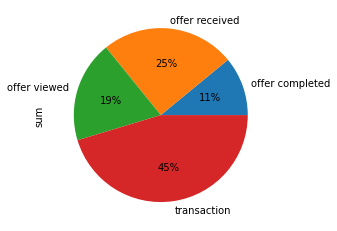

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

port = pd.read_csv("portfolio.csv")
trans = pd.read_csv("transcript.csv")
prof = pd.read_csv("profile.csv")
trans

trans2 = trans.copy()
trans2["sum"] = 1
fi, ax = plt.subplots()
trans2_plot = trans2.groupby("event").sum()["sum"].plot.pie(autopct='%.0f%%')
trans2_plot
trans


Predicting how much a customer will spend (based on the age, income, and sex):

In [134]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
df = trans.copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
df = df.merge(prof, left_on="person", right_on="id")[
    ["person", "value", "age", "income", "gender"]]
df["value"] = df["value"].str.replace("{", "", regex=True)
df["value"] = df["value"].str.replace("}", "", regex=True)
df["value"] = df["value"].str.replace("amount", "", regex=True)
df["value"] = df["value"].str.replace("id", "", regex=True)

df["value"] = df["value"].str.replace("offer", "", regex=True)
df["value"] = df["value"].str.replace(":", "", regex=True)
df["value"] = df["value"].str.replace("'", "", regex=True)
df["value"] = df["value"].str.replace("_", "", regex=True)


del df["person"]
df = df.reset_index()

df

#cleaning is done, time to implement knn



,index,value,age,income,gender
0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
1,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
2,2,19.89,75,100000.0,F
3,3,"9b98b8c7a33c4b65b9aebfe6a799e6d9, reward 5",75,100000.0,F
4,4,17.78,75,100000.0,F
...,...,...,...,...,...
306529,306529,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306530,306530,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306531,306531,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F
306532,306532,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F


DYLAN: EDA of 'Profile'

    Personal Notes:
    - Do some chi squares of like age, income, and gender on the transaction or offer received
    - You can convert some of the categorical variables into numbers and use the .corr() function
    - To find linear correlations
    - Also make like pie charts of the customers using the profile csv
    - Age and income should be like a line graph maybe. Or like a scattered plot or something

We will first analyse the AGE DISTRIBUTION of the Starbucks customers using the 'age' column from 'profile'

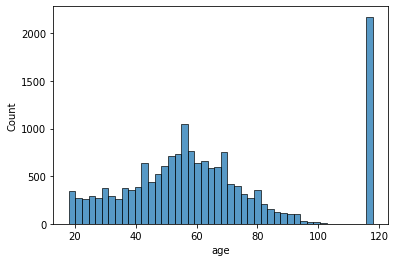

In [135]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('mode.chained_assignment',  None)
pd.set_option('display.max_columns', None)


prof = prof = pd.read_csv("profile.csv")
prof.head()

#there are some null values in the 'profile'.
prof.isna().sum()

sns.histplot(data=prof, x='age')
plt.show()



Here we see a higher number of unsually high (or old) aged people in our 'profile' data set. 

We will now take a closer look and check the statistical information of 'profile'

In [136]:
prof['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

We were able to find that the suspicious high age seems to be 118 years old.

Interestingly, the customers who have suspiciously high age also have the null value in 'gender' and 'income'.
This means it is natural that weremove them from the original 'profile' for the future.

So, the cleaned 'profile' looks like this:

In [137]:
prof = prof.dropna()
prof.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


Now we will find the GENDER DISTRIBUTION using the column 'gender' in the 'profile'.

First, we will observe the gender count then proceed to the proportion. 

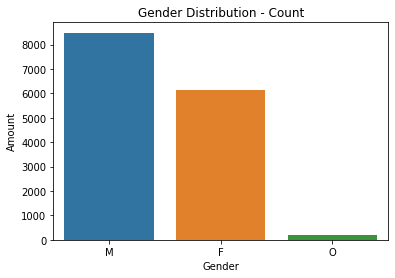

In [138]:
#drop unnamed:0 column from all dataframes
#prof.drop('Unnamed: 0', axis=1, inplace=True)
#sns.countplot(prof['gender'])

#see gender count

sns.barplot(x=prof['gender'].value_counts().index, y=prof['gender'].value_counts())
plt.title('Gender Distribution - Count')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()



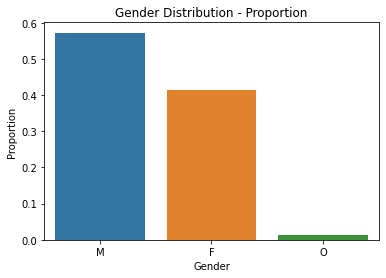

In [139]:
#see proportion of genders
sns.barplot(x=prof['gender'].value_counts().index, y=prof['gender'].value_counts(normalize=True))
plt.title('Gender Distribution - Proportion')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

From the variable description, some entries contain 'O' for other rather than 'M' or 'F'.
The gender distirbution is like above, the customers consists of about 57% of male, 40% of female and 3% of the 3rd other sex. 
So, it looks like there are more male Starbucks customers than female Starbucks customers.

Now we will analyze the income dsitribution by using the 'income column' in the 'profile'.

Recall that all the missing income were from the 'other' group, because I made every person with no gender as 'other'.

First, we will plot a box plot chart to give us an indication of how spread out the values in the data are. 

Text(0.5, 1.0, 'Income distribution spread')

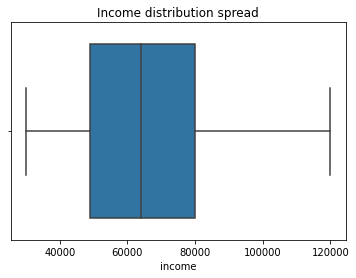

In [141]:
sns.boxplot(data=prof, x='income')
plt.title('Customer Income Spread')

Next, 

Text(0.5, 1.0, 'Income per gender')

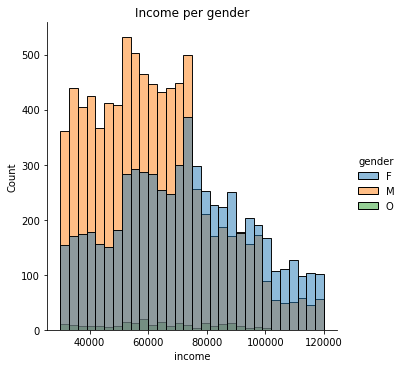

In [ ]:
sns.displot(prof, x='income', hue='gender', bins=30)
plt.title('Income per gender')

Text(0, 0.5, 'Income Amount * 1e8')

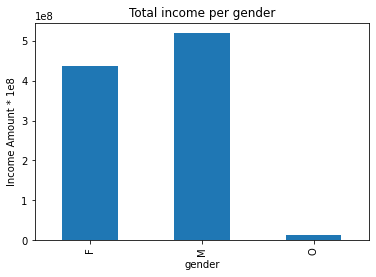

In [ ]:
prof.groupby('gender').sum()['income'].plot(kind='bar')
plt.title('Total income per gender')
plt.ylabel('Income Amount (* 1e8)')

From these two charts, we can see that the total income for males is higher, despite the number of females in the higher income (75k or more) are greater than males.

Now, we will create a new 'track_income' column to use for comparison and plot the histogram.
And to finish off, we will also calculate the average mean income and median income for all customers, regardless of gender.

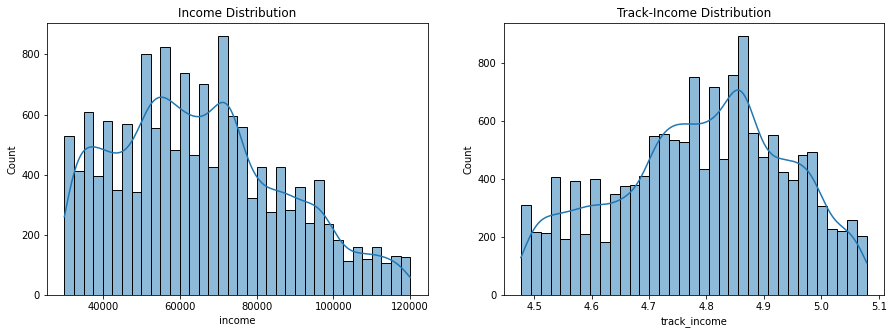

Average income is: $65404.992
Median income is: $64000.0


In [ ]:
prof['track_income'] = prof['income'].apply(np.log10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['income', 'track_income']):
    sns.histplot(ax=axes[i], data=prof, x=col, kde=True)

axes[0].set_title('Income Distribution')
axes[1].set_title('Track-Income Distribution')
plt.show()

print('Average income is: ${}'.format(round(prof['income'].mean(), 3)))
print('Median income is: ${}'.format(prof['income'].median()))


Now we will find the average PURCHASE DISTRIBUTION. 

To accomplish this, we first need to merge 'profile' and 'transcript' data sets.

In [ ]:
profile_transcript = prof.merge( right=trans, how='left', left_on='id', right_on='person')
profile_transcript.head()

,gender,age,id,became_member_on,income,track_income,Unnamed: 0,person,event,value,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,20282,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,49501,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,150597,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,201571,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,227842,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528


The amount of money spent information is located in the 'transcript -> value whose event == transaction -> amount'.
After that, we extract the amount paid using a regular expression module (re).

In [ ]:
import re

transaction = profile_transcript.loc[profile_transcript['event'] == 'transaction']
offer = profile_transcript.loc[profile_transcript['event'] != 'transaction']

pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})

transaction.head()

,gender,age,id,became_member_on,income,track_income,Unnamed: 0,person,event,amount,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,20282,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,49501,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,227842,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,5.000000,47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132
10,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,5.000000,49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144


Now, we will make a Pivot Table that contains the average mean purchase amount by each Starbucks member.
Also, we will be adding each member's demographic status by merging the pivot table with 'profile':

In [ ]:
mean_amount_by_member = pd.pivot_table(data=transaction, values='amount', index='id', aggfunc='mean').reset_index()
mean_amount_by_member

mean_amount_by_member = mean_amount_by_member.merge(right=prof, how='left', on='id')
mean_amount_by_member.head()


,id,amount,gender,age,became_member_on,income,track_income
0,0009655768c64bdeb2e877511632db8f,15.950000,M,33,20170421,72000.0,4.857332
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000,O,40,20180109,57000.0,4.755875
2,0020c2b971eb4e9188eac86d93036a77,24.607500,F,59,20160304,90000.0,4.954243
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500,F,24,20161111,60000.0,4.778151
4,003d66b6608740288d6cc97a6903f4f0,2.685556,F,26,20170621,73000.0,4.863323


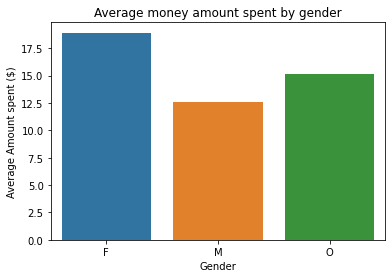

In [ ]:
amount_by_gender = mean_amount_by_member.groupby(by='gender').mean()['amount']

sns.barplot(x = amount_by_gender.index, y = amount_by_gender)

plt.title('Average money amount spent by gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount spent ($)')
plt.show()

From this, we see that Starbucks female customers spend, on average, $5 more than male customers at Starbucks. 

END OF DYLAN PROFILE EDA

Predicting how much a customer will spend based on the age, income, and sex:

In [ ]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray
moneySpent = trans[trans["event"] == "transaction"].copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
moneySpent = moneySpent.merge(prof, left_on="person", right_on="id")[
    ["person", "value", "age", "income", "gender"]]
moneySpent["value"] = moneySpent["value"].str.replace("{", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("}", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("amount", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace(":", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("''", "", regex=True)
moneySpent["value"] = moneySpent["value"].astype(float)

#creating one hot encoding for gender
data = asarray([['F'], ['M'], ['O']])
print(data)

encoder = OneHotEncoder(sparse=False)

onehot = encoder.fit_transform(data)
print(onehot)

#implement onehot
moneySpent["F"] = moneySpent["gender"].copy()
moneySpent["M"] = moneySpent["gender"].copy()
moneySpent["O"] = moneySpent["gender"].copy()

moneySpent["F"] = moneySpent["F"].replace("F", 1)
moneySpent["F"] = moneySpent["F"].replace("M", 0)
moneySpent["F"] = moneySpent["F"].replace("O", 0)
moneySpent["F"] = moneySpent["F"].fillna(0)
moneySpent["F"] = moneySpent["F"].astype(int)


moneySpent["M"] = moneySpent["M"].replace("M", 1)
moneySpent["M"] = moneySpent["M"].replace("F", 0)
moneySpent["M"] = moneySpent["M"].replace("O", 0)
moneySpent["M"] = moneySpent["M"].fillna(0)
moneySpent["M"] = moneySpent["M"].astype(int)


moneySpent["O"] = moneySpent["O"].replace("O", 1)
moneySpent["O"] = moneySpent["O"].replace("M", 0)
moneySpent["O"] = moneySpent["O"].replace("F", 0)
moneySpent["O"] = moneySpent["O"].fillna(0)
moneySpent["O"] = moneySpent["O"].astype(int)


moneySpent["gender"] = moneySpent["gender"].replace("F", True)
moneySpent["gender"] = moneySpent["gender"].replace("M", True)
moneySpent["gender"] = moneySpent["gender"].replace("O", True)
moneySpent["gender"] = moneySpent["gender"].fillna(False)
moneySpent["gender"] = moneySpent["gender"].astype(bool)

#drop rows with no income
moneySpent = moneySpent.dropna(subset=["income"])

del moneySpent["person"]
moneySpent = moneySpent.reset_index()

#cleaning is done, time to implement knn


[['F']
 ['M']
 ['O']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

train = train_test_split(moneySpent, test_size=0.2)
test = train_test_split(moneySpent, test_size=0.2)

del train[0]
display(train)
#y_train = train["value"]

#x_train = train.drop("value", axis=1)

'''x_test = test.drop("value", axis=1)
y_test = test["value"]

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

rmse_val = [] 
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
'''


[         index  value  age    income  gender  F  M  O
 51976    51976   5.21   62   37000.0    True  0  1  0
 57928    57928  16.43   69   72000.0    True  0  1  0
 44139    44139  19.54   38   87000.0    True  1  0  0
 44834    44834   3.48   27   59000.0    True  0  1  0
 110999  110999  17.53   87   89000.0    True  1  0  0
 ...        ...    ...  ...       ...     ... .. .. ..
 62058    62058  23.82   79  113000.0    True  0  1  0
 93356    93356  29.17   84  106000.0    True  1  0  0
 33505    33505  20.55   70  114000.0    True  1  0  0
 44096    44096   7.70   60   36000.0    True  1  0  0
 66747    66747   2.46   20   49000.0    True  0  1  0
 
 [24792 rows x 8 columns]]

'x_test = test.drop("value", axis=1)\ny_test = test["value"]\n\nscaler = MinMaxScaler(feature_range=(0, 1))\n\nx_train_scaled = scaler.fit_transform(x_train)\nx_train = pd.DataFrame(x_train_scaled)\n\nx_test_scaled = scaler.fit_transform(x_test)\nx_test = pd.DataFrame(x_test_scaled)\n\nrmse_val = [] \nfor K in range(10):\n    K = K+1\n    model = neighbors.KNeighborsRegressor(n_neighbors = K)\n\n    model.fit(x_train, y_train)  #fit the model\n    pred=model.predict(x_test) #make prediction on test set\n    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse\n    rmse_val.append(error) #store rmse values\n    \n'